In [7]:
import pandas as pd
import os
from sklearn.svm import SVR
import matplotlib.pyplot as plt

from fireTS.models import NARX, DirectAutoRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [230]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [312]:
df = pd.read_csv('data/2018_1hourdata.csv')
X = df['EASH_WASH_in'].values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
scaler = MinMaxScaler(feature_range=(0, 1)).fit(train.reshape(-1, 1))
train = scaler.transform(train.reshape(-1, 1)).reshape(1, -1)[0]
test = scaler.transform(test.reshape(-1, 1)).reshape(1, -1)[0]
#lag = 24
#X_train, y_train, X_test, y_test, scaler = process_data(train, test, lag)

In [342]:
narx_mdl = NARX(LinearRegression(), auto_order=24, exog_order=[2], exog_delay=[0])
narx_mdl.fit(train[:, None], train)

In [314]:
ypred_narx = narx_mdl.predict(test[:, None], test, step=24)

In [315]:
mae = mean_absolute_error(test[47:], ypred_narx[47:])
rmse = np.sqrt(mean_squared_error(test[47:], ypred_narx[47:]))
mse = mean_squared_error(test[47:], ypred_narx[47:])
r2 = r2_score(test[47:], ypred_narx[47:])
#mape = MAPE(test[47:], ypred_narx[47:])

In [316]:
# Average error of all timestamps of the test dataset
print('MAE:', mae)
print('RMSE:', rmse)
print('MSE:', mse)
print('R2:', r2)
#print('MAPE:', df_error["mape"].mean())

MAE: 0.08927113046135027
RMSE: 0.12950226746433566
MSE: 0.016770837278404328
R2: 0.713855212450069


In [317]:
ytest = pd.Series(test)
ypred_narx = pd.Series(ypred_narx)

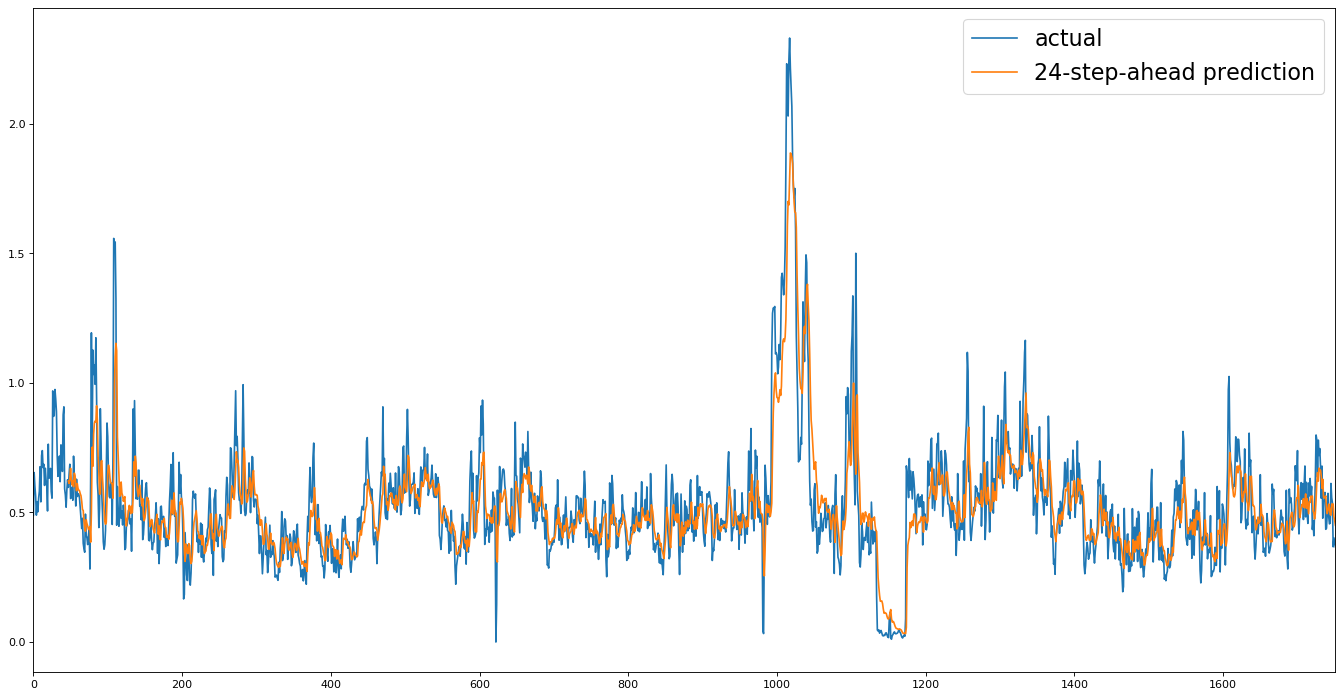

In [318]:
plt.figure(figsize=(21, 11), dpi= 80, facecolor='w', edgecolor='k')
ytest.plot(label='actual')
ypred_narx.plot(label='24-step-ahead prediction')
plt.legend(fontsize=20)

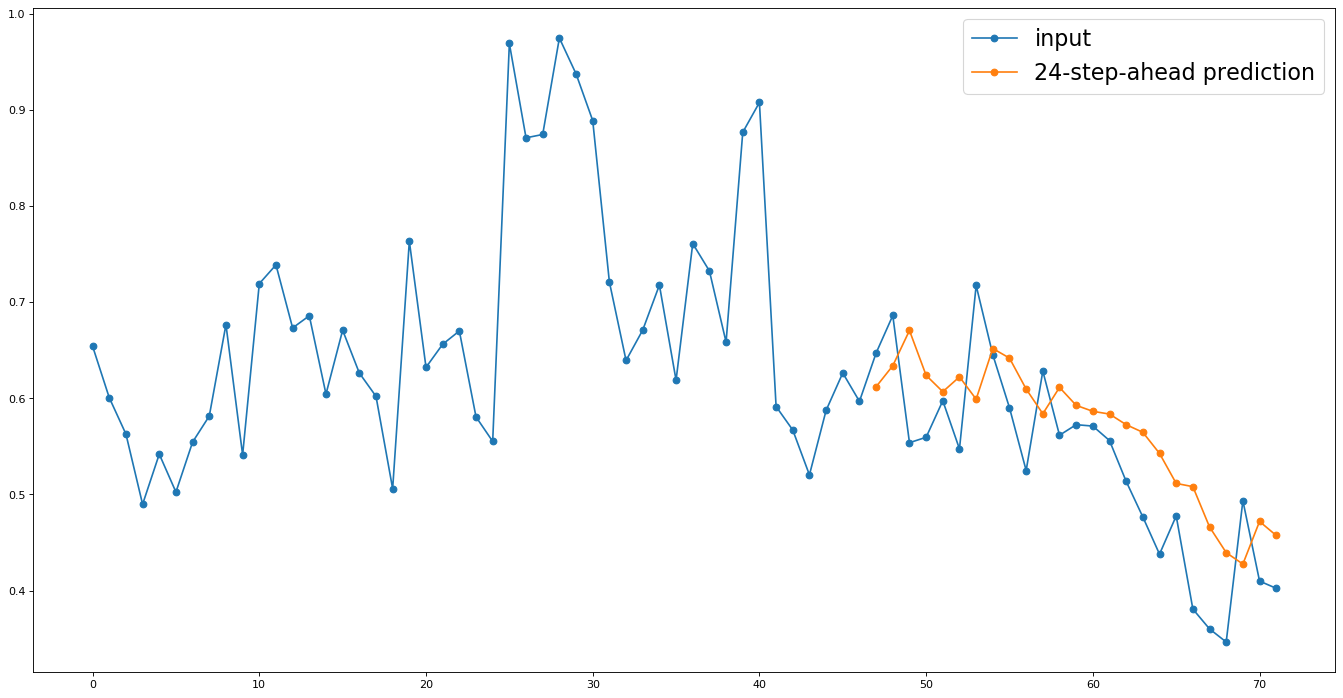

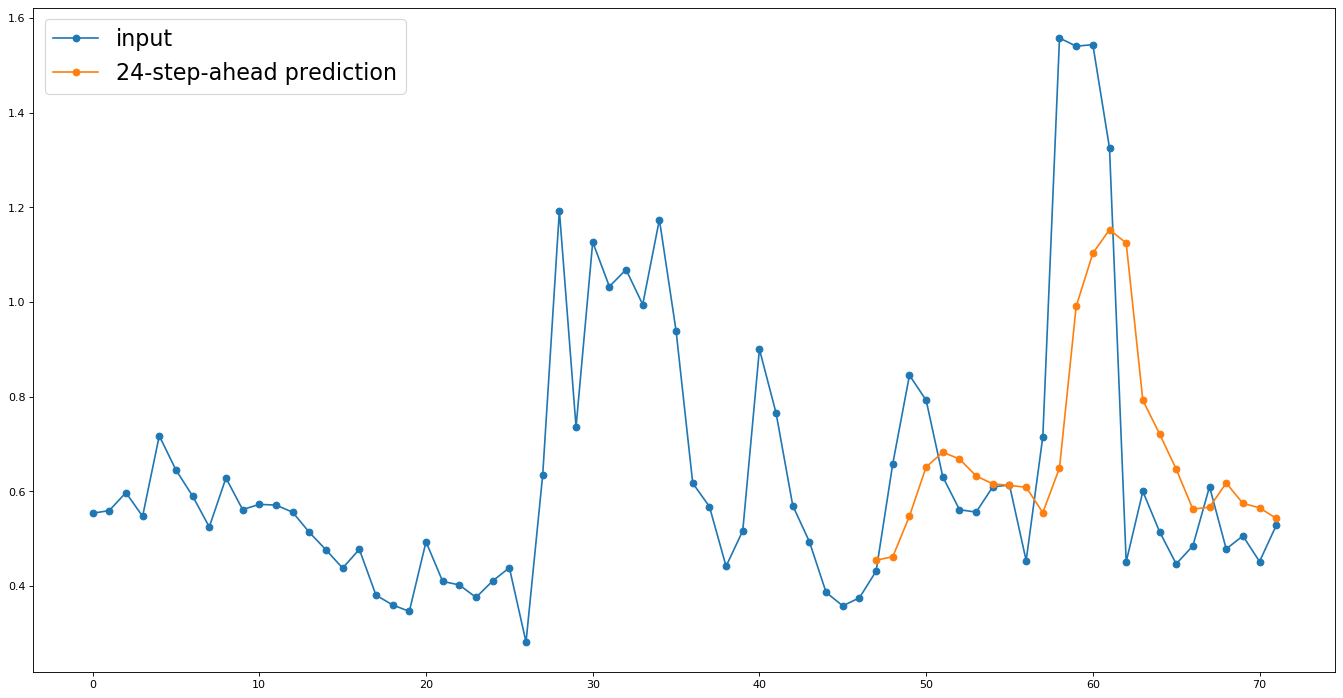

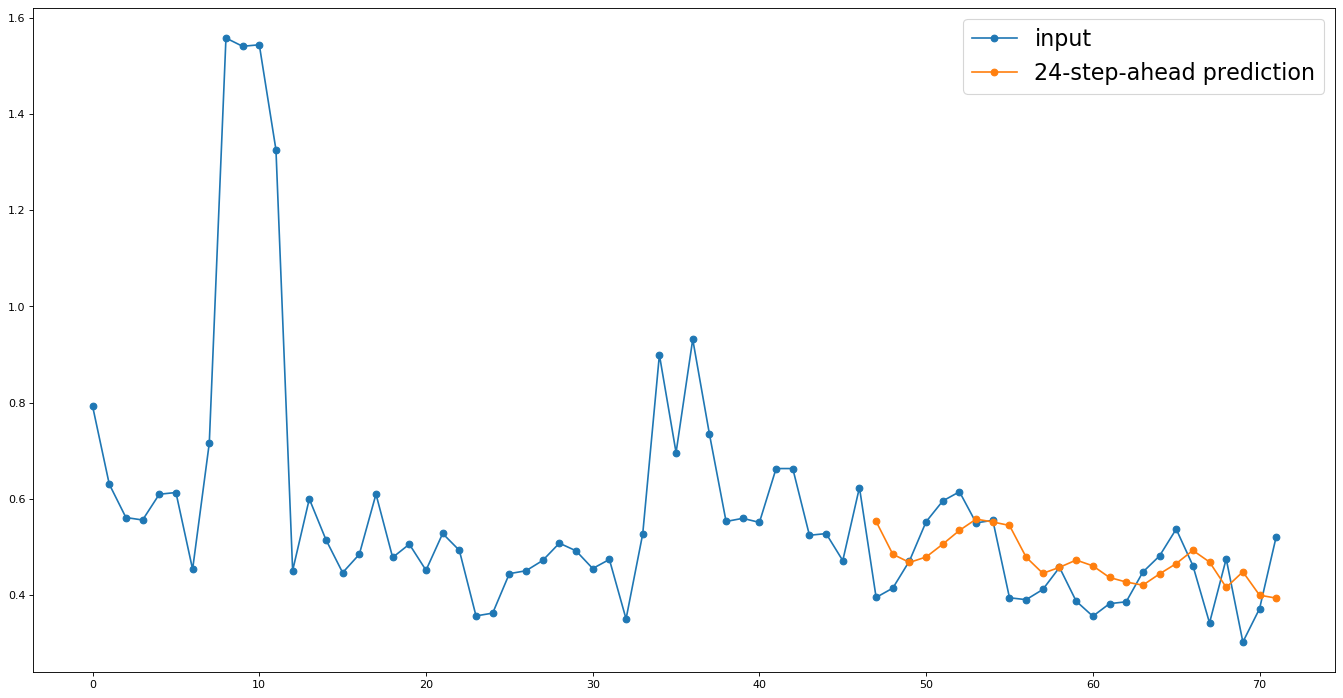

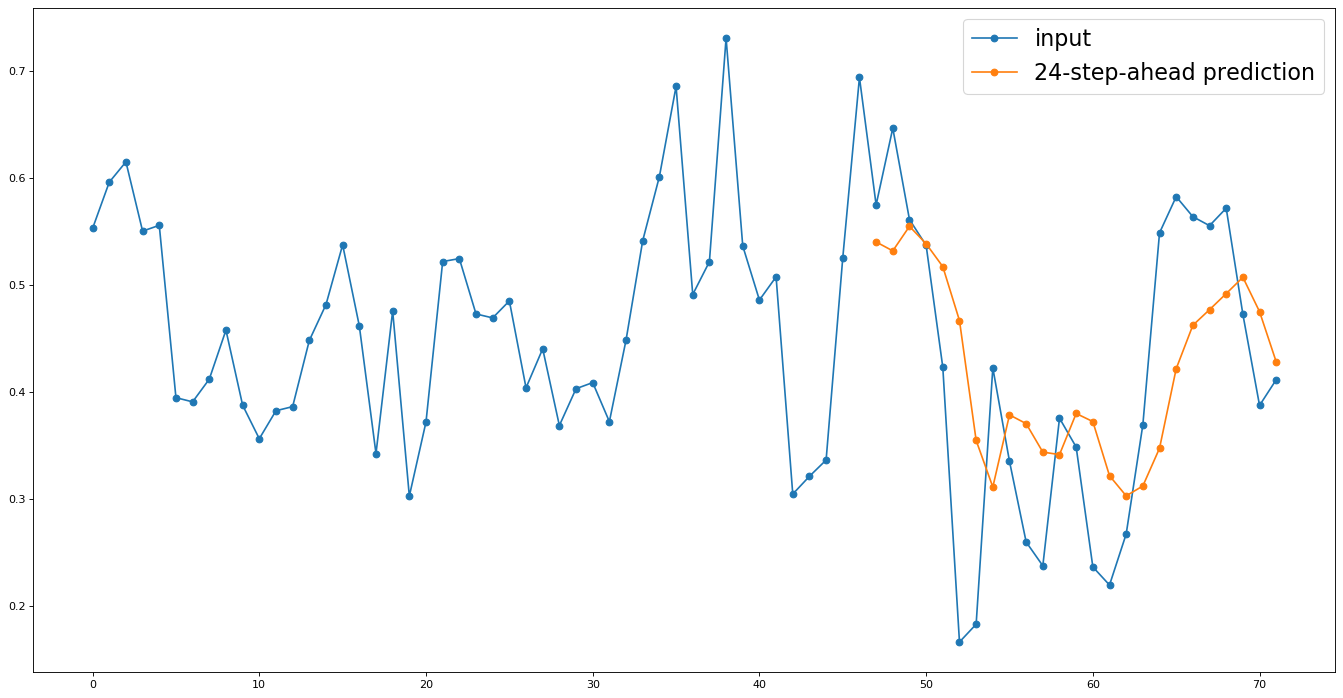

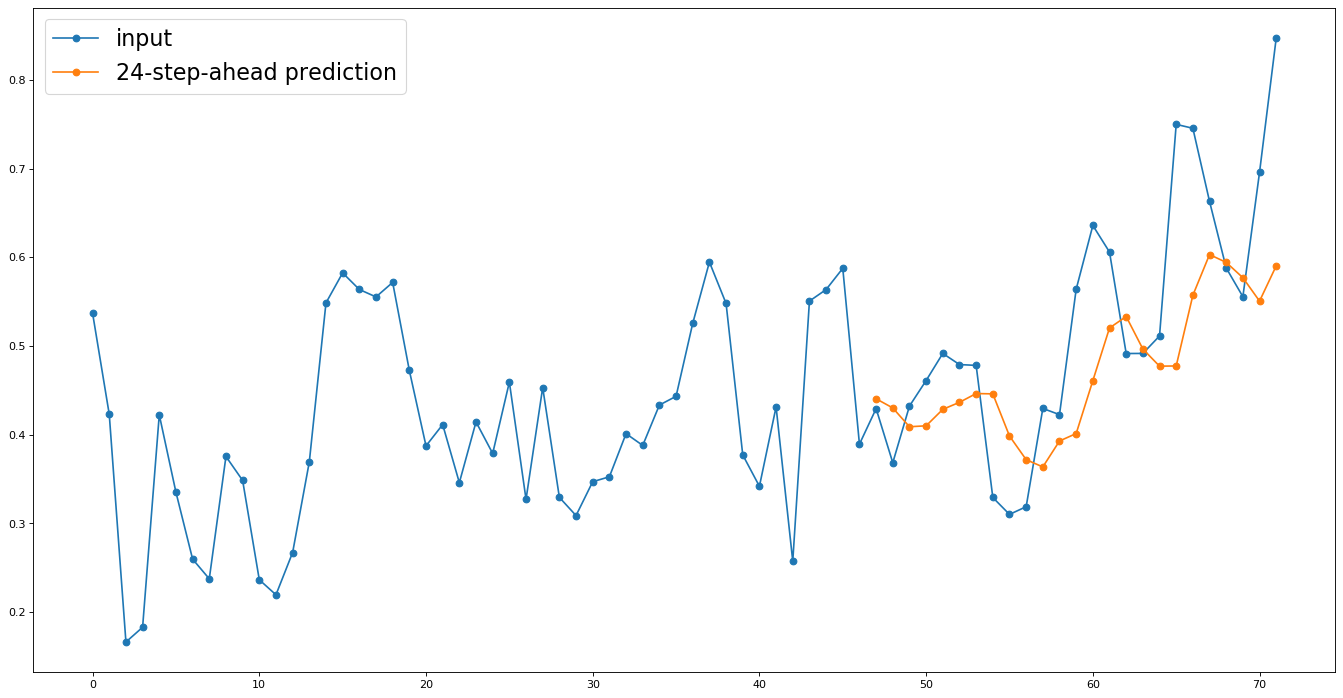

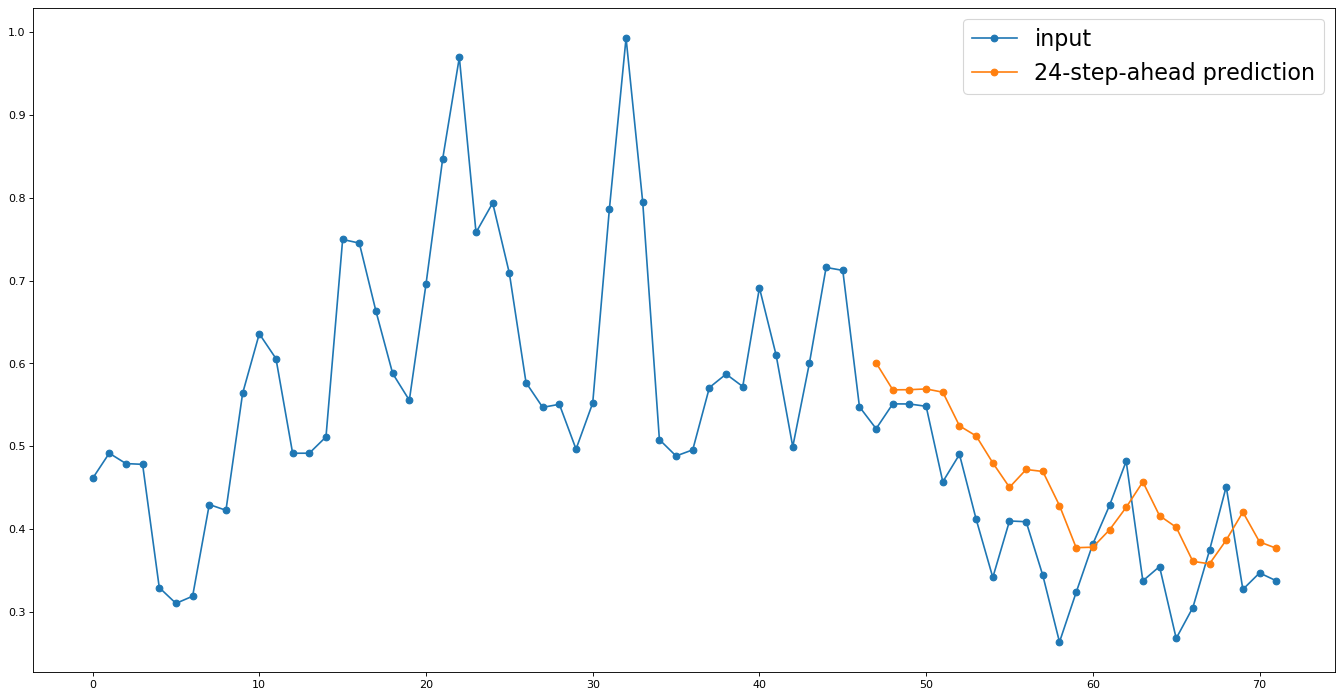

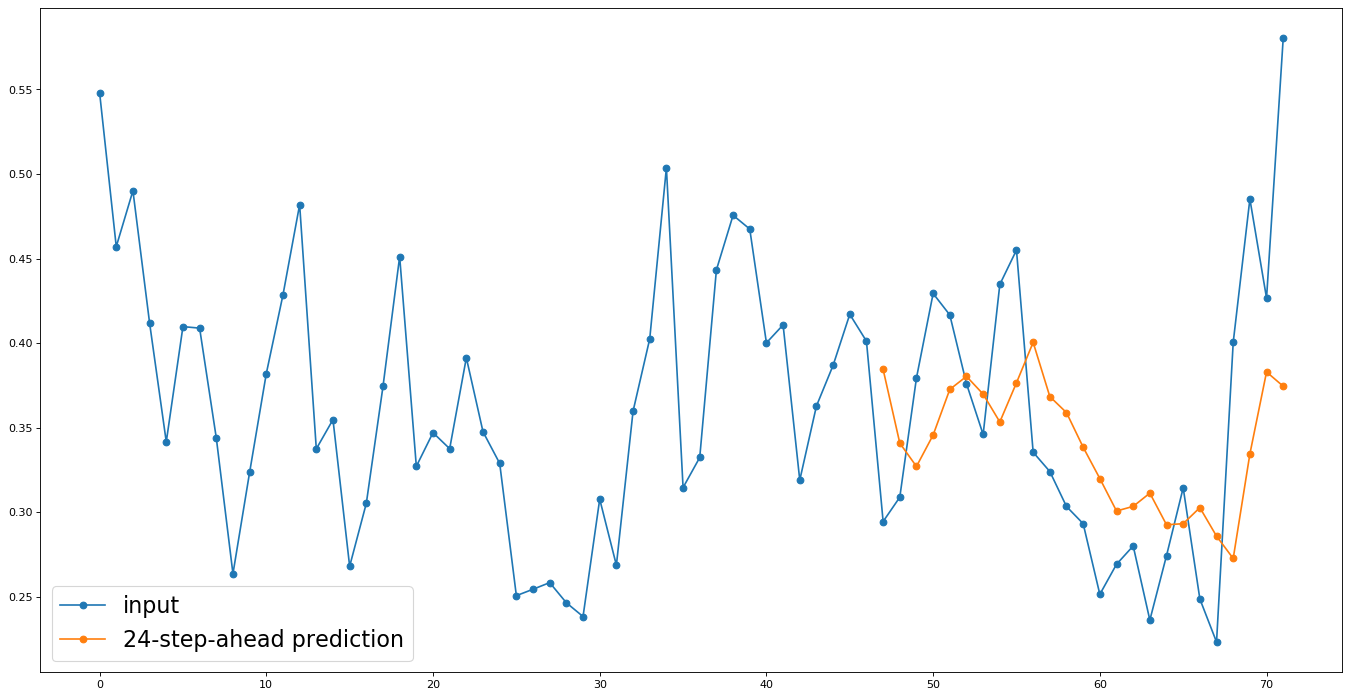

In [339]:
r2_list = []
gen_list = [1, 50, 100, 150, 200, 250, 300]
for i in range(len(gen_list)):
    
    start = gen_list[i]
    end = start + 48 + 24
    test_new = test[start:end]
    ypred_narx = narx_mdl.predict(test_new[:, None], test_new, step=24)
    #r2 = r2_score(test[23+i:], ypred_narx[23+i:])
    #r2_list.append(r2)
    
    
    plt.figure(figsize=(21, 11), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(test_new,'o-', label='input')#, linewidth=6)
    plt.plot(ypred_narx, 'o-',  label='24-step-ahead prediction')#, linewidth=6)
    #ytest.plot(label='actual')
    #ypred_narx.plot(label=str(i)+'-step-ahead prediction')
    plt.legend(fontsize=20)